In [1]:
import numpy as np
from scipy import special as spc
from numpy import random as r
from matplotlib import pyplot as plt
from matplotlib.patches import Circle

In [7]:
c = 2.99792458e8
me = 9.1093856e-31
mi = 1.6726219e-27

In [5]:
def f(u):
    return(u**2/(me**3*c**3*theta*spc.kn(2,1/theta))*np.e**(-np.sqrt(1+(u/(me*c))**2)/theta))
def sobol(n):
    u = np.zeros(n)
    for i in range(u.size):
        x4 = 1
        while ((u[i]/(me*c)-np.sqrt(1+(u[i]/(me*c))**2))/theta)<=np.log(x4):
            x1 = r.rand()
            x2 = r.rand()
            x3 = r.rand()
            x4 = r.rand()
            u[i] = - theta * me * c * np.log(x1*x2*x3)
    return (u)

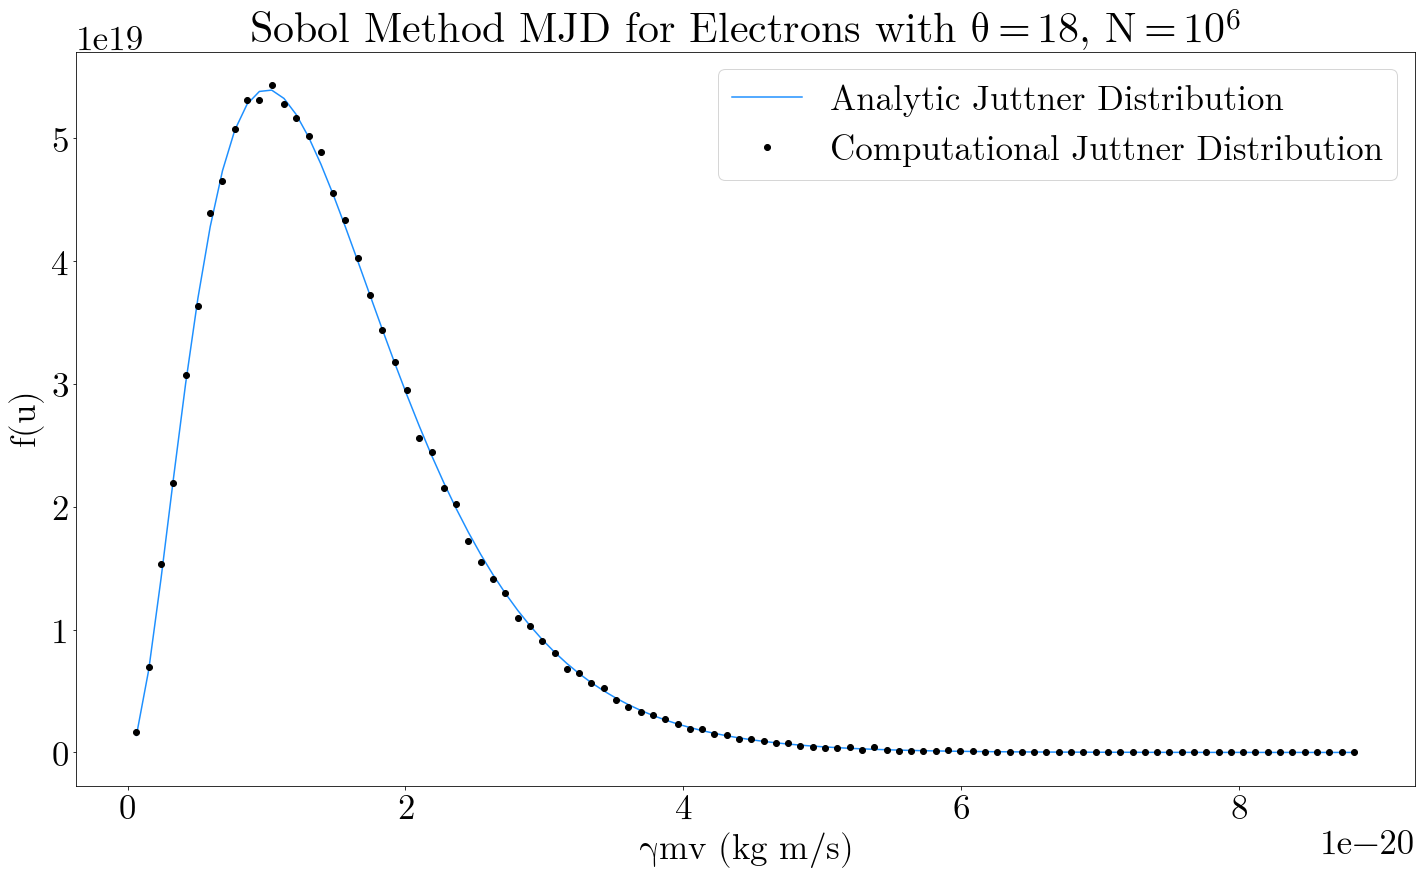

In [7]:
theta = 0.01*mi/me
n = 10**5
us = sobol(n)
cmjd, u = np.histogram(us,bins=100,density=True)
u = (u[1:]+u[:-1])/2
amjd = f(u)
plt.rcParams.update({'font.size': 35})
plt.rcParams.update({'font.family': 'serif','font.serif': 'Latin Modern Math', 'mathtext.fontset': 'custom', 'mathtext.rm':'Latin Modern Math','mathtext.it':'Latin Modern Math:italic','mathtext.bf':'Latin Modern Math:bold'})
plt.plot(u,amjd,'dodgerblue')
plt.plot(u,cmjd,color = 'black', marker='o',linestyle=' ')
plt.title('Sobol Method MJD for Electrons with $\\theta = 18$, $N = 10^6$')
plt.gca().set_xlabel('$\\gamma m v$ (kg m/s)')
plt.gca().set_ylabel('$f(u)$')
plt.gcf().set_facecolor('white')
plt.legend(('Analytic Juttner Distribution','Computational Juttner Distribution'))
plt.gcf().set_size_inches((24,13.5))
#plt.savefig('Large Theta Distribution.png')

In [8]:
def f(u):
    return(u**2/(mi**3*c**3*theta*spc.kn(2,1/theta))*np.e**(-np.sqrt(1+(u/(mi*c))**2)/theta))
def sobol(n):
    u = np.zeros(n)
    for i in range(u.size):
        x4 = 1
        while np.e**((u[i]/(mi*c)-np.sqrt(1+(u[i]/(mi*c))**2))/theta)<=x4:
            x1 = r.rand()
            x2 = r.rand()
            x3 = r.rand()
            x4 = r.rand()
            u[i] = - theta * mi * c * np.log(x1*x2*x3)
    return (u)

In [10]:
def maxwellBoltzman(u):
    return((1/(2*np.pi*theta))**(3/2)*4*np.pi*u**2/(mi**3*c**3)*np.e**(-u**2/(2*mi**2*c**2*theta)))

In [11]:
def simpson(f,x):
    v = np.zeros(x.size)
    for i in range(v.size-1):
        v[i+1] += v[i]
        v[i+1] += (x[i+1]-x[i])/6*(f(x[i])+4*f((x[i]+x[i+1])/2)+f(x[i+1]))
    return(v)
def interpolation(xTable,yTable,x):
    if type(x) == np.ndarray:
        v = np.zeros(x.size)
        for j in range(x.size):
            for i in range(xTable.size):
                if(x[j] <= xTable[i]):
                    v[j] = (yTable[i]-yTable[i-1])/(xTable[i]-xTable[i-1])*(x[j]-xTable[i-1])+yTable[i-1]
                    break
        return(v)
    else:
        for i in range(xTable.size):
            if(x <= xTable[i]):
                return((yTable[i]-yTable[i-1])/(xTable[i]-xTable[i-1])*(x-xTable[i-1])+yTable[i-1])
def intCDF(n,f,x):
    v = np.zeros(n)
    for i in range(n):
        v[i] = interpolation(f,x,r.rand())
    return(v)

In [14]:
theta = 0.01
vMax = np.sqrt(2*theta*c**2)
uMax = 5*mi*vMax
u = np.arange(0,uMax,uMax/2000)
s = simpson(f,u)
s = s/max(s)
n = 10**5
us = intCDF(n,s,u)
y, x = np.histogram(us,bins = 100,density = True)
x = (x[:-1]+x[1:])/2
v = f(u)
y = y*sum(v)*(u[1]-u[0])

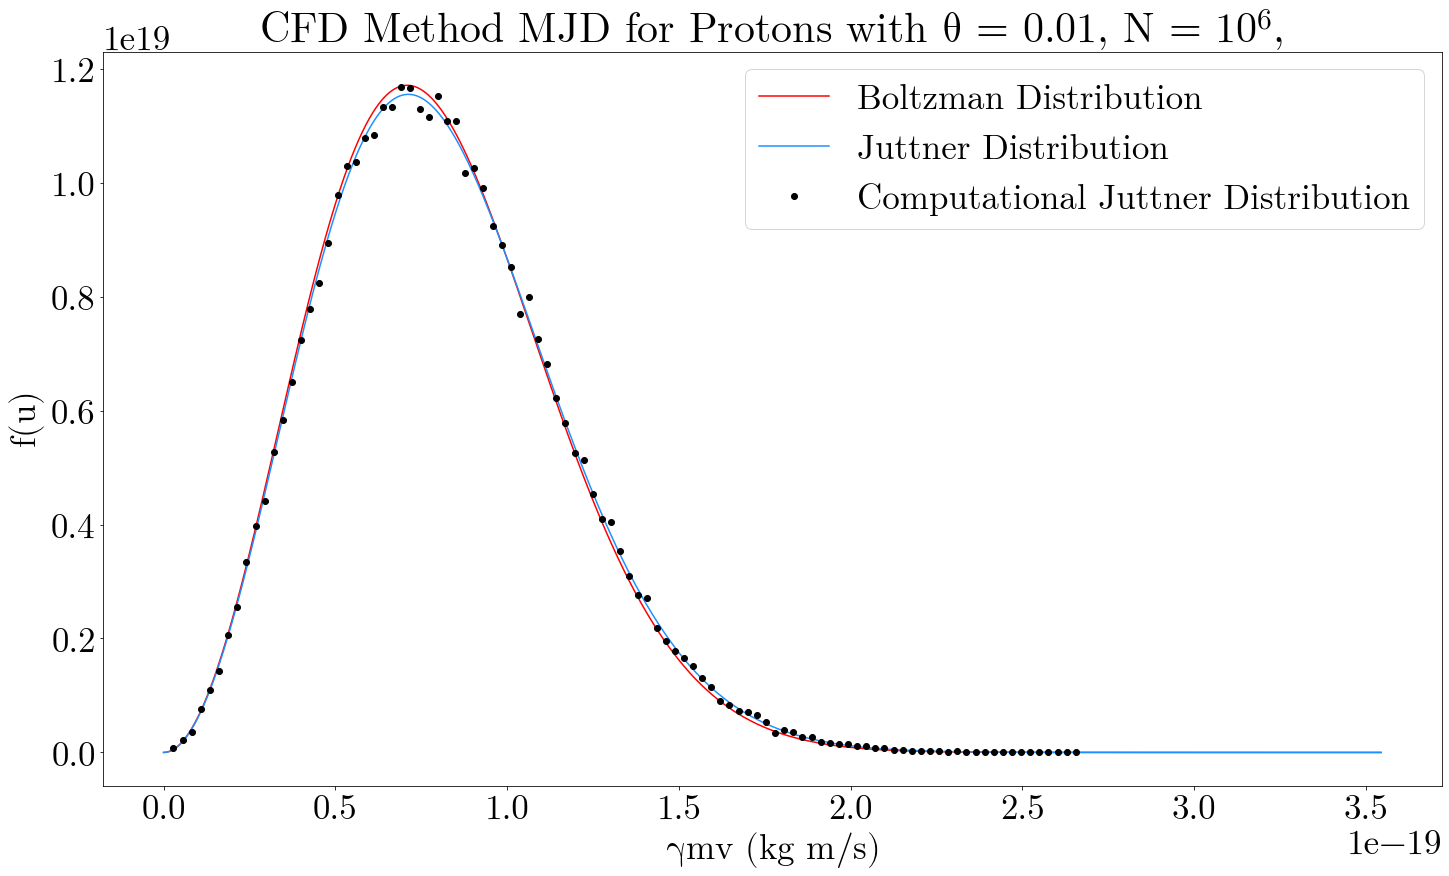

In [15]:
theta = 0.01
plt.plot(u,maxwellBoltzman(u), color = 'red')
plt.plot(u,f(u), color = 'dodgerblue')
plt.plot(x,y,linestyle = '',marker ='o', color = 'black')
plt.title('CFD Method MJD for Protons with $\\theta$ = 0.01, N = $10^6$, ')
plt.rcParams.update({'font.size': 35})
plt.rcParams.update({'font.family': 'serif','font.serif': 'Latin Modern Math', 'mathtext.fontset': 'custom', 'mathtext.rm':'Latin Modern Math','mathtext.it':'Latin Modern Math:italic','mathtext.bf':'Latin Modern Math:bold'})
plt.gca().set_xlabel('$\\gamma m v$ (kg m/s)')
plt.gca().set_ylabel('$f(u)$')
plt.gcf().set_facecolor('white')
plt.legend(('Boltzman Distribution','Juttner Distribution','Computational Juttner Distribution'))
plt.gcf().set_size_inches((24,13.5))
#plt.savefig('Small Theta Distribution.png')

In [89]:
def f(u):
    return(u**2/(me**3*c**3*theta*spc.kn(2,1/theta))*np.e**(-np.sqrt(1+(u/(me*c))**2)/theta))
def fBoost(u,beta):
    Gamma = 1/np.sqrt(1-beta**2)
    return( 1/(2 * me * c * Gamma**3 * spc.kn(2,1/theta)) * (Gamma * np.sqrt(1 + (u/(me * c))**2) + theta) * np.e**(-Gamma/theta * (np.sqrt(1 + (u/(me * c))**2) - beta * u/(me * c))))

def sobolBoost(n,beta):
    u = np.zeros(n)
    for i in range(u.size):
        x4 = 1
        while ((u[i]/(me*c)-np.sqrt(1+(u[i]/(me*c))**2))/theta)<=np.log(x4):
            x1 = r.rand()
            x2 = r.rand()
            x3 = r.rand()
            x4 = r.rand()
            u[i] = - theta * me * c * np.log(x1*x2*x3)
        x5 = r.rand()
        x6 = r.rand()    
        ux = u[i]*(2*x5-1)
        if -beta*(ux/(me*c))/np.sqrt(1+(u[i]/(me*c))**2) > x6:
            ux = -ux
        Gamma = 1/(np.sqrt(1-beta**2))
        gamma = np.sqrt(1+(u[i]/(me*c))**2)
        u[i] = Gamma*(ux+me*beta*c*gamma)
    return (u)

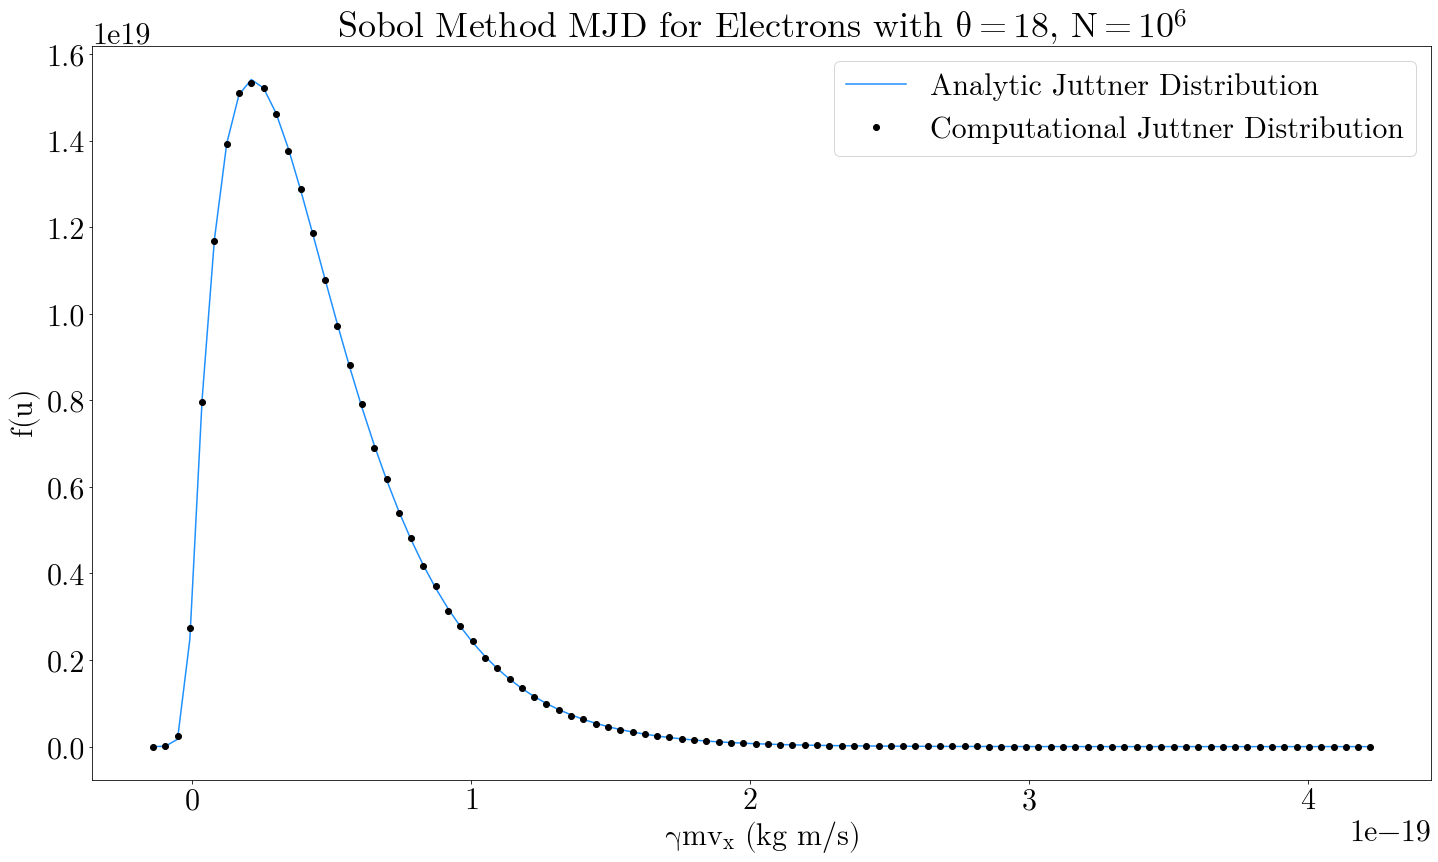

In [91]:
theta = 20
n = 10**6
beta = 0.9
us = sobolBoost(n,beta)
cmjd, u = np.histogram(us,bins=100,density=True)
u = (u[1:]+u[:-1])/2
amjd = fBoost(u,beta)
plt.rcParams.update({'font.size': 30})
plt.rcParams.update({'font.family': 'serif','font.serif': 'Latin Modern Math', 'mathtext.fontset': 'custom', 'mathtext.rm':'Latin Modern Math','mathtext.it':'Latin Modern Math:italic','mathtext.bf':'Latin Modern Math:bold'})
plt.plot(u,amjd,'dodgerblue')
plt.plot(u,cmjd,color = 'black', marker='o',linestyle=' ')
plt.title('Sobol Method MJD for Electrons with $\\theta = 18$, $N = 10^6$')
plt.gca().set_xlabel('$\\gamma m v_x$ (kg m/s)')
plt.gca().set_ylabel('$f(u)$')
plt.gcf().set_facecolor('white')
plt.legend(('Analytic Juttner Distribution','Computational Juttner Distribution'))
plt.gcf().set_size_inches((24,13.5))

In [88]:
c = 2.99792458e8
me = 9.1093856e-31
mi = 1.6726219e-27
def f(u):
    return(u**2/(me**3*c**3*theta*spc.kn(2,1/theta))*np.e**(-np.sqrt(1+(u/(me*c))**2)/theta))
def gammaDist(u):
    return(u**2/2/(theta*me*c)**3*np.e**(-u/(theta*me*c)))
def sobol(n):
    u = np.zeros(n)
    for i in range(u.size):
        x4 = 1
        while ((u[i]/(me*c)-np.sqrt(1+(u[i]/(me*c))**2))/theta)<=np.log(x4):
            x1 = r.rand()
            x2 = r.rand()
            x3 = r.rand()
            x4 = r.rand()
            u[i] = - theta * me * c * np.log(x1*x2*x3)
    return (u)

In [89]:
def maxwellBoltzman(u):
    return((1/(2*np.pi*theta))**(3/2)*4*np.pi*u**2/(me**3*c**3)*np.e**(-u**2/(2*me**2*c**2*theta)))

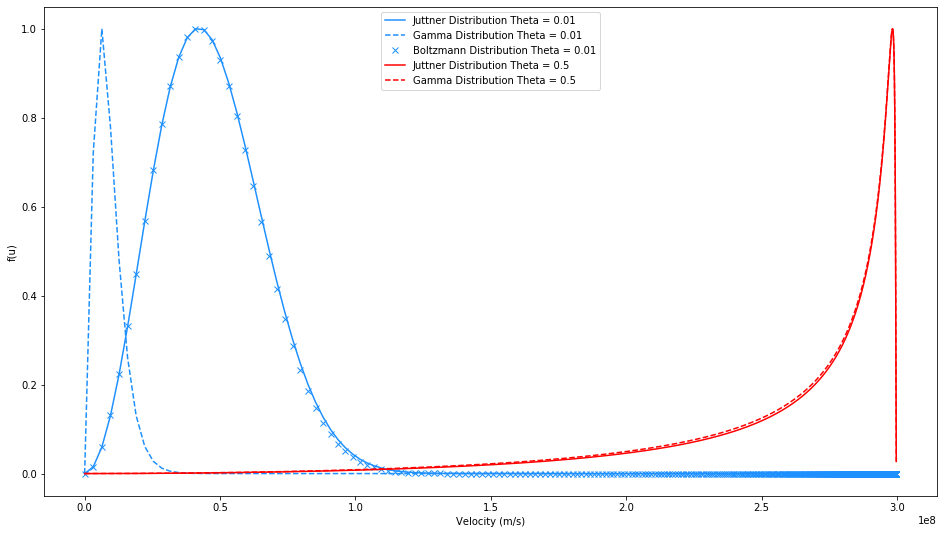

In [95]:
#theta = 0.05
#us1 = sobol(100)
#theta = 5
#us2 = sobol(100)
u = np.arange(0,max(us2),(max(us2)-min(us1))/4000)
theta = 0.01
dist1 = f(u)
dist1 /= max(dist1)
dist2 = gammaDist(u)
dist2 /= max(dist2)
dist3 = maxwellBoltzman(u)
dist3 /= max(dist3)
plt.plot(u/np.sqrt(1+(u/(me*c))**2)/me,dist1, color = 'dodgerblue')
plt.plot(u/np.sqrt(1+(u/(me*c))**2)/me,dist2,'--',color='dodgerblue')
plt.plot(u/np.sqrt(1+(u/(me*c))**2)/me,dist3,'x',color='dodgerblue')
theta = 5
dist1 = f(u)
dist1 /= max(dist1)
dist2 = gammaDist(u)
dist2 /= max(dist2)
plt.plot(u/np.sqrt(1+(u/(me*c))**2)/me,dist1, color = 'red')
plt.plot(u/np.sqrt(1+(u/(me*c))**2)/me,dist2,'--',color='red')
plt.legend(('Juttner Distribution Theta = 0.01', 'Gamma Distribution Theta = 0.01', 'Boltzmann Distribution Theta = 0.01' ,'Juttner Distribution Theta = 5', 'Gamma Distribution Theta = 5'))
plt.gca().set_xlabel('Velocity (m/s)')
plt.gca().set_ylabel('f(u)')
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(16,9)

In [2]:
def maxwellBoltzman(u):
    return((1/(2*np.pi*theta))**(3/2)*4*np.pi*u**2/(me**3*c**3)*np.e**(-u**2/(2*me**2*c**2*theta)))
def gaussianBoost(n,beta):
    u = np.zeros((n,3))
    Gamma = 1/(np.sqrt(1-beta**2))
    for i in range(n):
        v = np.sqrt(2*theta*c**2)
        x1 = r.rand()
        x2 = r.rand()
        x3 = r.rand()
        x4 = r.rand()
        ux = me*v*np.sqrt(-np.log(x1))*np.sin(2*np.pi*x2)
        uy = me*v*np.sqrt(-np.log(x1))*np.cos(2*np.pi*x2)
        uz = me*v*np.sqrt(-np.log(x3))*np.sin(2*np.pi*x4)
        u[i,0] = np.sqrt(ux**2 + uy**2 + uz**2)
        x5 = r.rand()
        if -beta*(ux/(me*c))/np.sqrt(1+(u[i,0]/(me*c))**2) > x5:
            ux = -ux
        Gamma = 1/(np.sqrt(1-beta**2))
        gamma = np.sqrt(1+(u[i,0]/(me*c))**2)
        ux = Gamma*(ux+me*beta*c*gamma)
        u[i,0] = ux
        u[i,1] = uy
        u[i,2] = uz
    return u
def f(u):
    return(u**2/(me**3*c**3*theta*spc.kn(2,1/theta))*np.e**(-np.sqrt(1+(u/(me*c))**2)/theta))
def sobolG(n):
    u = np.zeros(n)
    for i in range(n):
        x5 = np.e**(-1/theta)
        while ( (((u[i]/(me*c))**2)/2-np.sqrt(1+(u[i]/(me*c))**2))/theta) >= np.log(x5):
            v = np.sqrt(2*theta*c**2)
            x1 = r.rand()
            x2 = r.rand()
            x3 = r.rand()
            x4 = r.rand()
            ux = me*v*np.sqrt(-np.log(x1))*np.sin(2*np.pi*x2)
            uy = me*v*np.sqrt(-np.log(x1))*np.cos(2*np.pi*x2)
            uz = me*v*np.sqrt(-np.log(x3))*np.sin(2*np.pi*x4)
            u[i] = np.sqrt(ux**2 + uy**2 + uz**2)
            x5 = r.rand()
        return (u)
def fBoost(u,beta):
    Gamma = 1/np.sqrt(1-beta**2)
    return( 1/(2 * me * c * Gamma**3 * spc.kn(2,1/theta)) * (Gamma * np.sqrt(1 + (u/(me * c))**2) + theta) * np.e**(-Gamma/theta * (np.sqrt(1 + (u/(me * c))**2) - beta * u/(me * c))))
def sobolGBoost(n,beta):
    u = np.zeros((n,3))
    for i in range(n):
        x5 = np.e**(-1/theta)
        while ( (((u[i,0]/(me*c))**2)/2-np.sqrt(1+(u[i,0]/(me*c))**2))/theta) >= np.log(x5):
            v = np.sqrt(2*theta*c**2)
            x1 = r.rand()
            x2 = r.rand()
            x3 = r.rand()
            x4 = r.rand()
            ux = me*v*np.sqrt(-np.log(x1))*np.sin(2*np.pi*x2)
            uy = me*v*np.sqrt(-np.log(x1))*np.cos(2*np.pi*x2)
            uz = me*v*np.sqrt(-np.log(x3))*np.sin(2*np.pi*x4)
            u[i,0] = np.sqrt(ux**2 + uy**2 + uz**2)
            x5 = r.rand()
        if -beta*(ux/(me*c))/np.sqrt(1+(u[i,0]/(me*c))**2) > x5:
            ux = -ux
        Gamma = 1/(np.sqrt(1-beta**2))
        gamma = np.sqrt(1+(u[i,0]/(me*c))**2)
        ux = Gamma*(ux+me*beta*c*gamma)
        u[i,0] = ux
        u[i,1] = uy
        u[i,2] = uz
    return (u)

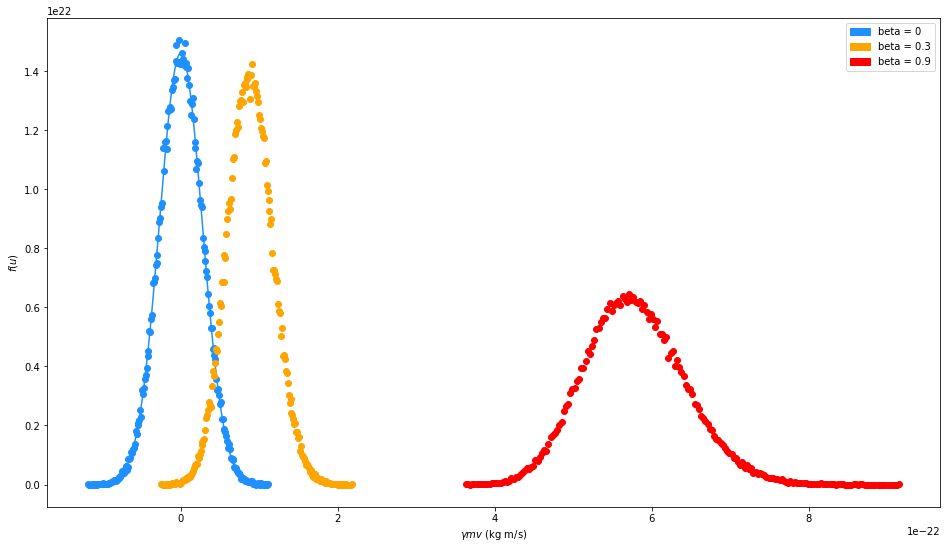

In [8]:
theta = 0.01
#us = sobolGBoost(10**5,0.9)
#us = np.transpose(us)
#uxs = us[0]
#cmjd, u = np.histogram(uxs,bins=200,density=True)
#u = (u[1:]+u[:-1])/2
#amjd = fBoost(u,0.1)
#plt.rcParams['font.size']=34
#plt.plot(u,cmjd)
#plt.plot(u,amjd)
us = gaussianBoost(10**5,0.0)
us = np.transpose(us)
uxs = us[0]
cmjd, u = np.histogram(uxs,bins=200,density=True)
u = (u[1:]+u[:-1])/2
amjd = np.e**(-u**2/(2*me**2*c**2*theta))
amjd = amjd/(sum(amjd)*(u[1]-u[0]))
plt.plot(u,amjd,color = 'dodgerblue')
plt.plot(u, cmjd,color = 'dodgerblue', linestyle = ' ', marker = 'o')

us = gaussianBoost(10**5,0.3)
us = np.transpose(us)
uxs = us[0]
cmjd, u = np.histogram(uxs,bins=200,density=True)
u = (u[1:]+u[:-1])/2
plt.plot(u, cmjd,color = 'orange', linestyle = ' ', marker = 'o')

us = gaussianBoost(10**5,0.9)
us = np.transpose(us)
uxs = us[0]
cmjd, u = np.histogram(uxs,bins=200,density=True)
u = (u[1:]+u[:-1])/2
plt.plot(u, cmjd,color = 'red', linestyle = ' ', marker = 'o')

custom_dots = [Circle((0,0),0.1,color='dodgerblue'),Circle((0,0),0.1,color='orange'),Circle((0,0),0.1,color='red')]

plt.gca().legend(custom_dots, ['beta = 0', 'beta = 0.3', 'beta = 0.9'])
plt.ylabel('$f(u)$')
plt.xlabel('$\\gamma mv$ (kg m/s)')

plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(16,9)